# Causal Data Science Week 1 Tutorial

This is the first tutorial for the Causal Data Science course. In it, we will give an overview of the python libaries that are used in the course: numpy, pandas, and more. Familiarity with these libraries is necessary to apply the 'DoWhy' package - a library used in implementing causal analysis.

## numpy

numpy is a library used for storing data and performing numerical operations on it. The documentation is available at: https://numpy.org/doc/stable/index.html, which is where these examples are drawn from (here we show just some exampes of what we can do with numpy).

In [2]:
# we first import numpy under the name 'np'
import numpy as np

# we convert the python list [6, 7, 8] into a numpy array name 'a'
a = np.array([6, 7, 8])

# we can view 'a' by calling it
a

array([6, 7, 8])

In [3]:
# we need to provide a list to create a numpy array
a = np.array(1, 2, 3, 4)    # WRONG, a list, [ ], needs to be provided

TypeError: array() takes from 1 to 2 positional arguments but 4 were given

numpy arrays can be multidimensional. Here, we used arange(15) to make the list [0, 1, 2, 3, 4, ..., 14], and turn it into a 3 x 5 matrix, and name it 'b'

In [20]:
b = np.arange(15).reshape(3, 5)

# we can again view 'b'
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

We can perform operations on numpy arrays. Some of the key functions include things like addition, subtraction, exponentiation

In [21]:
# we create two numpy arrays, 'a' and 'b', and add them together
a = np.array([20, 30, 40, 50])
b = np.arange(4) # this is the array [0, 1, 2, 3]
a + b

array([20, 31, 42, 53])

Arrays can be indexed and sliced the same way as lists in python

In [22]:
# we view the array 'a' from the first element (labelled 0) to the 2nd element
a[0:2]

array([20, 30])

With numpy and the other libraries we are using, you can usually find answers to any questions you have quite easily by googling/StackOverflow e.g. 'how to do integration numpy'

## pandas

pandas are used to store and manipulate dataframes, with multiple columns measuring different attributes. They are used as inputs for many machine learning libraries, including the library used in this course: DoWhy. Information and examples are available at https://pandas.pydata.org/pandas-docs/stable/index.html 

In [23]:
# we first import pandas under the name 'pd'
import pandas as pd

# we create a dataframe name 'df'. The letters 'A', 'B', 'C', etc. represent the columns and the rest the values for that column
df = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

# we can view our dataframe by calling it
df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [24]:
# we can view the first n rows of a dataframe using 'dataframe_name'.head(n)
df.head(3) # first three rows

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo


In [25]:
# we can view column(s) from the dataframe by calling the desired column(s)
df['E'] # column E

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']

In [26]:
# we can view specific rows using indices
df[0:2] # rows 0 to 1

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo


Data in a pandas dataframe can be plotted easily using matplotlib

<Axes: >

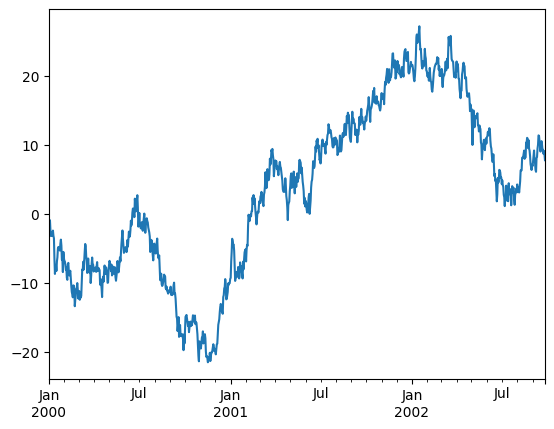

In [27]:
# we import pyplot with the name 'plt'
import matplotlib.pyplot as plt

# we create a random pandas series and apply the cumsum function
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot() # this is the command that plots the data

In [28]:
ts # this is the data plotted above

2000-01-01   -1.054223
2000-01-02   -1.766944
2000-01-03   -0.861600
2000-01-04   -2.410553
2000-01-05   -3.159223
                ...   
2002-09-22    9.359501
2002-09-23    8.766232
2002-09-24    9.181211
2002-09-25    8.674707
2002-09-26    7.849822
Freq: D, Length: 1000, dtype: float64

In [29]:
# here we've created a pandas dataframe again using random data, now with fours different columns 'A', 'B', 'C', and 'D'
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

# again we apply the cumsum function
df = df.cumsum()

df

,A,B,C,D
2000-01-01,-2.246828,-0.525584,-0.475564,-2.179268
2000-01-02,-2.947152,0.568261,1.079754,-0.918553
2000-01-03,-1.657105,2.798220,0.378436,-1.328726
2000-01-04,-0.124150,3.013510,-0.251447,-1.908146
2000-01-05,-2.313701,3.524116,-1.059682,-3.308843
...,...,...,...,...
2002-09-22,-34.100957,-5.386378,-39.685880,-31.901678
2002-09-23,-34.918248,-4.172444,-41.921252,-33.564487
2002-09-24,-34.720047,-4.227091,-39.286304,-32.711114
2002-09-25,-35.457797,-4.552886,-40.024249,-31.123141


<Figure size 640x480 with 0 Axes>

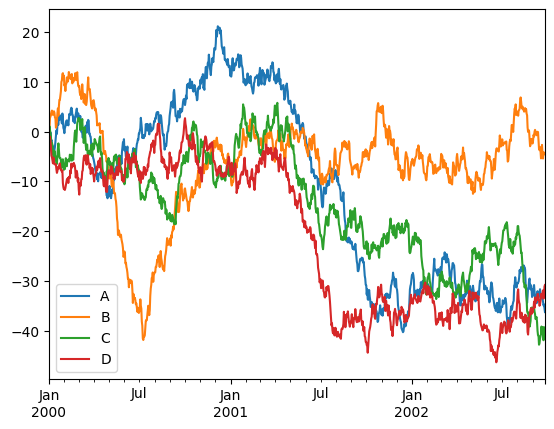

In [30]:
plt.figure()

# we can again plot the data, only now different columns are plotted separately
df.plot()

plt.legend(loc='best') # each column is plotted as a separate line in the plot

Data can be read into and written from pandas dataframes using formats like csv and excel files  

In [31]:
df.to_csv("foo.csv") # writing to a file called 'foo' with type csv

In [32]:
df2 = pd.read_csv("foo.csv") # reading from a csv file called 'foo'

# we can view the imported dataframe
df2

,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.246828,-0.525584,-0.475564,-2.179268
1,2000-01-02,-2.947152,0.568261,1.079754,-0.918553
2,2000-01-03,-1.657105,2.798220,0.378436,-1.328726
3,2000-01-04,-0.124150,3.013510,-0.251447,-1.908146
4,2000-01-05,-2.313701,3.524116,-1.059682,-3.308843
...,...,...,...,...,...
995,2002-09-22,-34.100957,-5.386378,-39.685880,-31.901678
996,2002-09-23,-34.918248,-4.172444,-41.921252,-33.564487
997,2002-09-24,-34.720047,-4.227091,-39.286304,-32.711114
998,2002-09-25,-35.457797,-4.552886,-40.024249,-31.123141


As with numpy, most of your questions about pandas can be answered with some good googling!

## scikit-learn

scikit-learn is a library used for tackling machine learning problems. It implements a number of supervised and unsupervised learning algorithms. The documentation is available at https://scikit-learn.org/stable/, and these examples are taken from https://scikit-learn.org/stable/tutorial/basic/tutorial.html.

Here, we import some example data from the library and fit a support vector machine (SVM) to classify what digits certain images show.

In [33]:
# we import 'datasets' from sklearn and load the 'digits' data
from sklearn import datasets
digits = datasets.load_digits()

We have a features data set (digits.data) and a targets data set (digits.target).

In [34]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [35]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

We can learn a model using 'fit', and then estimate targets based on unseen features using 'predict'. In this case, we use all data except the last sample to build the model, and then predict on the last. The model predicts that this last digit is '8'.

In [36]:
from sklearn import svm
# we create a svm.SVC object called 'clf'
clf = svm.SVC(gamma=0.001, C=100.)

# we fit the model using the 'digits' data, leaving out the last data point
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [37]:
# we can now use our fitted model to predict the last data point
clf.predict(digits.data[-1:])

array([8])

## DoWhy

DoWhy (https://www.pywhy.org/dowhy/v0.9.1/) is a Python library designed for performing causal inference. This is one of the main libraries we will be using in this course. It allows one quickly to identify and test causal relationships based on data and a causal graph.

You will first need to install the library using:
pip install dowhy

We will go through the example at https://www.pywhy.org/dowhy/v0.9.1/getting_started/index.html to get a basic overview of the library. It is not expected that you understand all steps of this process now, as this is what you will be learning through the course.

In [3]:
# we import the 'dowhy' library, the 'CausalModel' class, and 'dowhy.datasets' (this last for generated simulated data to test)
import dowhy
import pandas as pd
from dowhy import CausalModel
import dowhy.datasets

# the code below simple hides some warnings we don't want to see
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

We use a data generator from DoWhy to create a simulated data set where 'beta' is the true causal effect. This data also has a causal graph associated with it.

In [13]:
# data = dowhy.datasets.linear_dataset(beta=10,
#         num_common_causes=5,
#         num_instruments = 2,
#         num_samples=10000,
#         treatment_is_binary=True)

# # we extract the generated dataframe, and name it 'df'
# df = data["df"]
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str
df=pd.read_csv('lalonde_data.csv')
gml_graph = gml_to_string('frontdoor_criterion_graph.gml')
# we can view the first few entries in the dataframe
df.head()

,treat,age,education,black,hispanic,married,nodegree,re75,re78
0,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,9930.0460
1,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.0,3595.8940
2,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,24909.4500
3,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.0,7506.1460
4,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.0,289.7899


There is also a causal graph for this data, and we can view it in two different formats: 'dot graph' and 'gml graph'

In [7]:
# print(data["dot_graph"])

In [8]:
# print(data["gml_graph"])

We create a causal model with the data, the treatment variable, the outcome variable, and the causal graph.

In [18]:
# # With graph
model=CausalModel(
        data = df,
        treatment='treat',
        outcome='re78',
       graph=gml_graph
        )

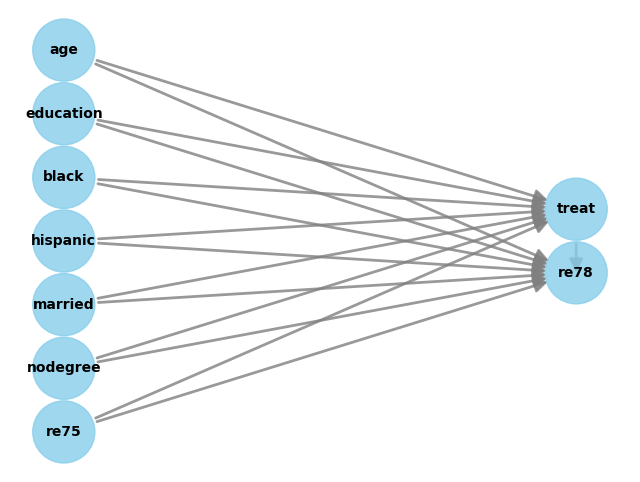

In [19]:
# we can visualise the model/graph
model.view_model()

Based on the graph, we can identify computable expressions based on the graph only. We can then evaluate these expressions in the next step.

In [20]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                
────────(E[re78|married,education,black,age,nodegree,re75,hispanic])
d[treat]                                                            
Estimand assumption 1, Unconfoundedness: If U→{treat} and U→re78 then P(re78|treat,married,education,black,age,nodegree,re75,hispanic,U) = P(re78|treat,married,education,black,age,nodegree,re75,hispanic)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



We can calculate a causal estimate based on the data and the expressions found in the previous step.

In [21]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                
────────(E[re78|married,education,black,age,nodegree,re75,hispanic])
d[treat]                                                            
Estimand assumption 1, Unconfoundedness: If U→{treat} and U→re78 then P(re78|treat,married,education,black,age,nodegree,re75,hispanic,U) = P(re78|treat,married,education,black,age,nodegree,re75,hispanic)

## Realized estimand
b: re78~treat+married+education+black+age+nodegree+re75+hispanic
Target units: ate

## Estimate
Mean value: 586.8030686967044

Causal Estimate is 586.8030686967044


/Users/sohamchatterjee/miniforge3/envs/DL1_cpu/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finally, there are a number of techniques we can apply to test whether the estimate is accurate when adding in noise, downsampling, etc.

In [22]:
res_random=model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")
print(res_random)

Refute: Add a random common cause
Estimated effect:586.8030686967044
New effect:586.8030686967043
p value:1.0



Here we've added a random common cause, and it has not significantly affected our estimate. This gives us more confidence in our estimate. There are numerous other refutation techniques available in DoWhy.

The example above uses synthetic data generated according to a causal graph. We can also apply DoWhy to real-world data where we believe there to be an underlying causal graph. In this example, we use DoWhy on the Infant Health and Development Program Dataset (Hill, J. L. (2011). Bayesian nonparametric modeling for causal inference. Journal of Computational and Graphical Statistics, 20(1), 217-240. https://doi.org/10.1198/jcgs.2010.08162). The example is taken from https://www.pywhy.org/dowhy/v0.9.1/example_notebooks/dowhy_refutation_testing.html.

In [23]:
# import pandas as pd
# # we first load the data from a URL
# data = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv", header = None)

# # here we are creating names for the columns
# col =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1" ,]
# for i in range(1,26):
#     col.append("x"+str(i))
# data.columns = col

# # finally, we change the treatment column to a boolean and view the top of the dataframe
# data = data.astype({"treatment":'bool'}, copy=False)
# data.head()

We can create the DoWhy causal model with the data and the common causes, and visualise the resulting causal graph.

In [24]:
# making all 'x' variables common causes
# common_causes = []

# for i in range(1, 26):
#     common_causes += ["x"+str(i)]

# # creating and viewing the CausalModel
# ihdp_model = CausalModel(
#                 data=data,
#                 treatment='treatment',
#                 outcome='y_factual',
#                 common_causes=common_causes
#             )
# ihdp_model.view_model(layout="dot")

We can identify the causal effect from the causal graph.

In [25]:
#Identify the causal effect for the ihdp dataset
ihdp_identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(ihdp_identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                
────────(E[re78|married,education,black,age,nodegree,re75,hispanic])
d[treat]                                                            
Estimand assumption 1, Unconfoundedness: If U→{treat} and U→re78 then P(re78|treat,married,education,black,age,nodegree,re75,hispanic,U) = P(re78|treat,married,education,black,age,nodegree,re75,hispanic)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



We can then calculate the causal estimate using propensity score weighting.

In [26]:
ihdp_estimate = model.estimate_effect(
                    ihdp_identified_estimand,
                    method_name="backdoor.propensity_score_stratification"
                )

print("The Causal Estimate is " + str(ihdp_estimate.value))

The Causal Estimate is 586.8030686967044


Finally, we test the validity of our estimate by replacing the treatment with a placebo. We see that there is now no effect from the treatment, increasing our confidence in our estimate.

In [27]:
ihdp_refute_placebo_treatment = model.refute_estimate(
                                    ihdp_identified_estimand,
                                    ihdp_estimate,
                                    method_name="placebo_treatment_refuter",
                                    placebo_type="permute"
                                )

print(ihdp_refute_placebo_treatment)

Refute: Use a Placebo Treatment
Estimated effect:586.8030686967044
New effect:-105.15042809595754
p value:0.96

